# Connecting Colab to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Sample - Superstore.csv'

Mounted at /content/drive


# Loading the Dataset into Pandas Dataframe

In [2]:
import pandas as pd

df = pd.read_csv(file_path, encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Data Cleaning

## Correcting the Data Types

* The Order Date and Ship Date columns are currently stored as object (text). We need to convert them to a datetime format to enable any date-based analysis, like looking at sales over time.


In [3]:
# Converting 'Order Date' and 'Ship Date' to the correct datetime format as this dataset uses a Month/Day/Year format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Verifying the changes by checking the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

After running the code, the output from `df.info()` shows **Order Date** and **Ship Date** as `datetime64[ns]` types. The data is now fully cleaned and prepared for analysis.

# Exploratory Data Analysis (EDA) and Visualization

* The goal here is to explore the data to answer business questions, uncover patterns, identify trends, and find interesting insights. We'll do this by asking a question, analyzing the data to find the answer, and then creating a chart to visualize it.

## Question 1: What are the best-selling and most profitable product categories?

* This helps us understand which product areas are the cornerstones of the business.

* It will calculate the total sales and profit for each product category and then create bar charts to display the results.

Sales and Profit by Category:
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


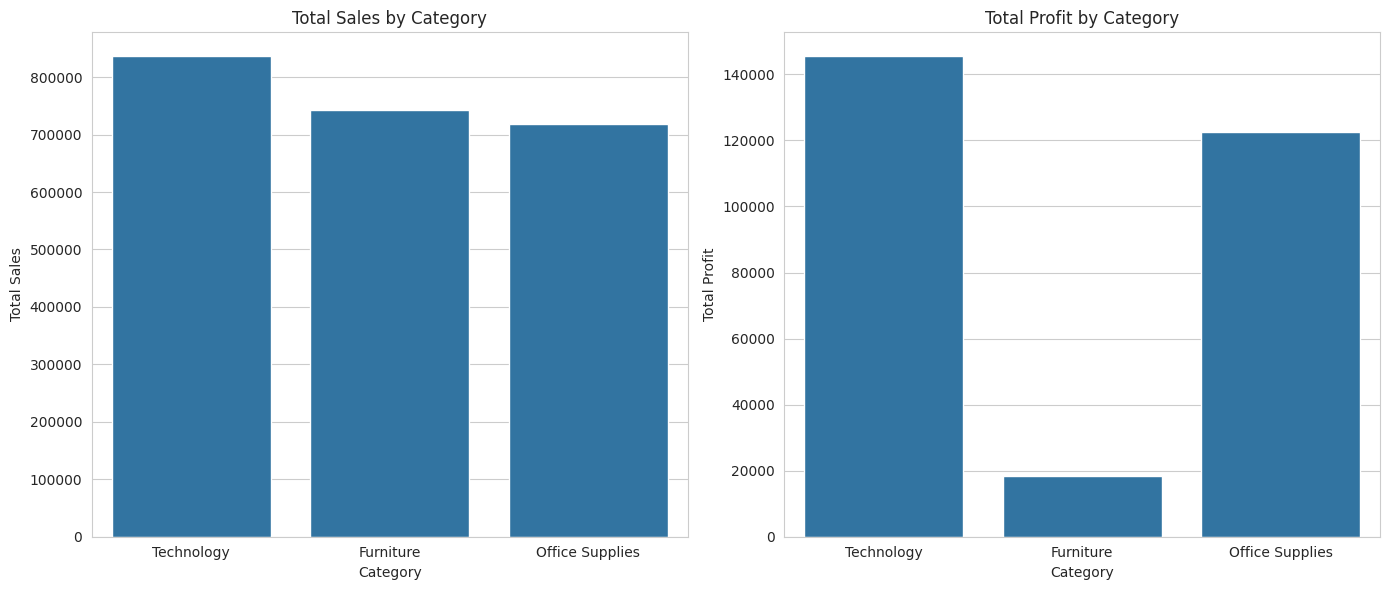

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our plots
sns.set_style('whitegrid')

# --- Analysis ---
# Group by 'Category' and calculate the sum of 'Sales' and 'Profit'
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("Sales and Profit by Category:")
print(category_analysis)

# --- Visualization ---
# Create two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Sales by Category
sns.barplot(x=category_analysis.index, y=category_analysis['Sales'], ax=axes[0])
axes[0].set_title('Total Sales by Category')
axes[0].set_ylabel('Total Sales')

# Plot for Profit by Category
sns.barplot(x=category_analysis.index, y=category_analysis['Profit'], ax=axes[1])
axes[1].set_title('Total Profit by Category')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

Insight: These charts clearly show that while **Technology** has the highest sales, the **Furniture** category is significantly less profitable than the others.

## Question 2: Which customer segment is most important?

* This tells us where the company's revenue and profits are coming from in terms of customer types.


Sales and Profit by Segment:
                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


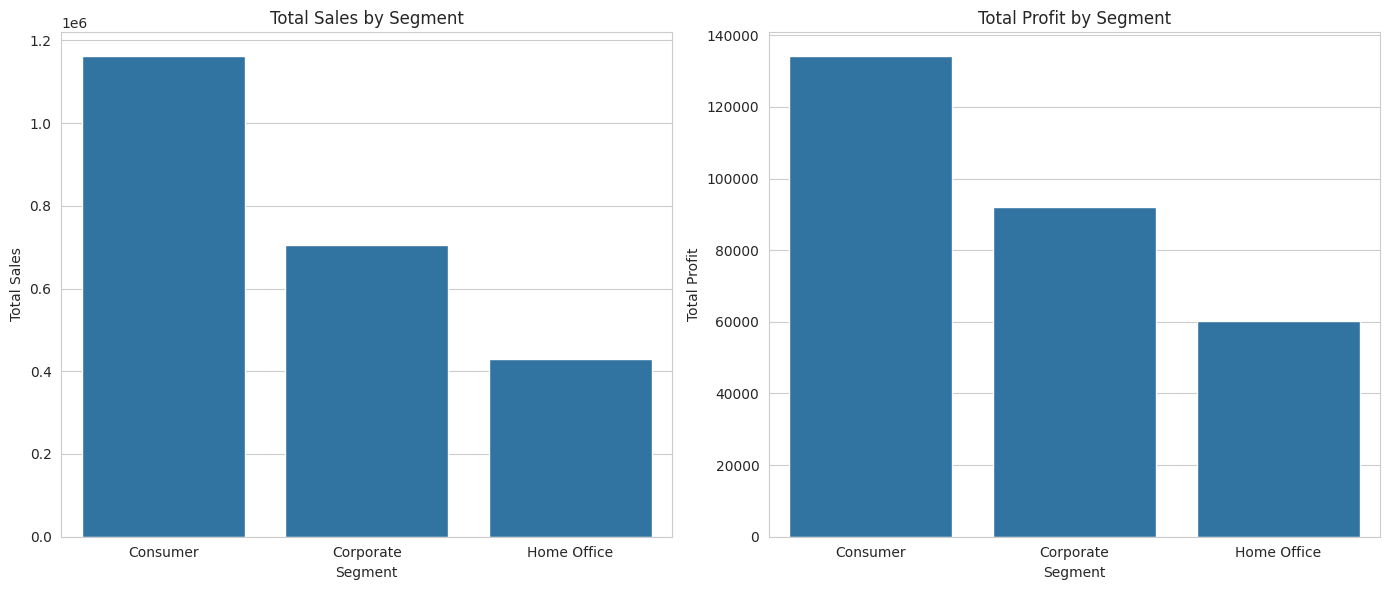

In [5]:
# --- Analysis ---
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nSales and Profit by Segment:")
print(segment_analysis)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Sales by Segment
sns.barplot(x=segment_analysis.index, y=segment_analysis['Sales'], ax=axes[0])
axes[0].set_title('Total Sales by Segment')
axes[0].set_ylabel('Total Sales')

# Plot for Profit by Segment
sns.barplot(x=segment_analysis.index, y=segment_analysis['Profit'], ax=axes[1])
axes[1].set_title('Total Profit by Segment')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

Insight: The **Consumer** segment is the largest driver of both sales and profit, followed by **Corporate**.

## Question 3: How do sales trend over time?

* This analysis helps us understand the overall health of the business and identify any seasonal patterns.


First 5 months of sales data:
Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64


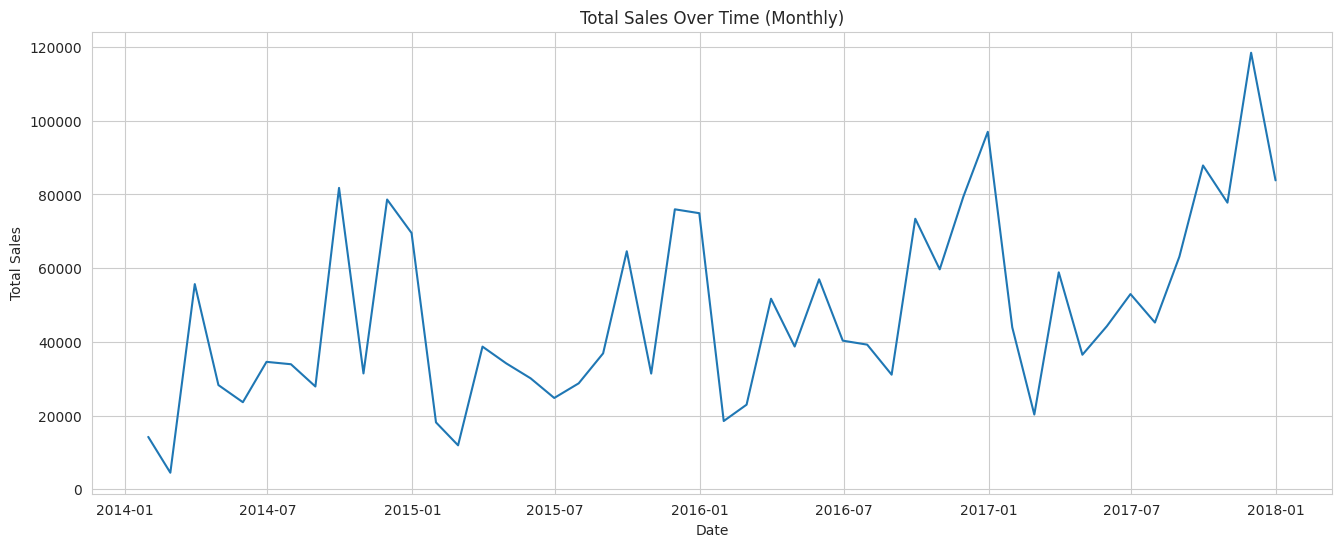

In [6]:
# --- Analysis ---
# We need to set 'Order Date' as the index to work with time-series data
df_time = df.set_index('Order Date')

# Resample the sales data by month and calculate the sum for each month
monthly_sales = df_time['Sales'].resample('ME').sum()
print("\nFirst 5 months of sales data:")
print(monthly_sales.head())

# --- Visualization ---
plt.figure(figsize=(16, 6))
plt.plot(monthly_sales)
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Insight: This line chart shows the growth trajectory of the business. It is  noticeable that sales tend to spike towards the end of each year, indicating a seasonal trend.

## Question 4: How Do Discounts Affect Profitability?

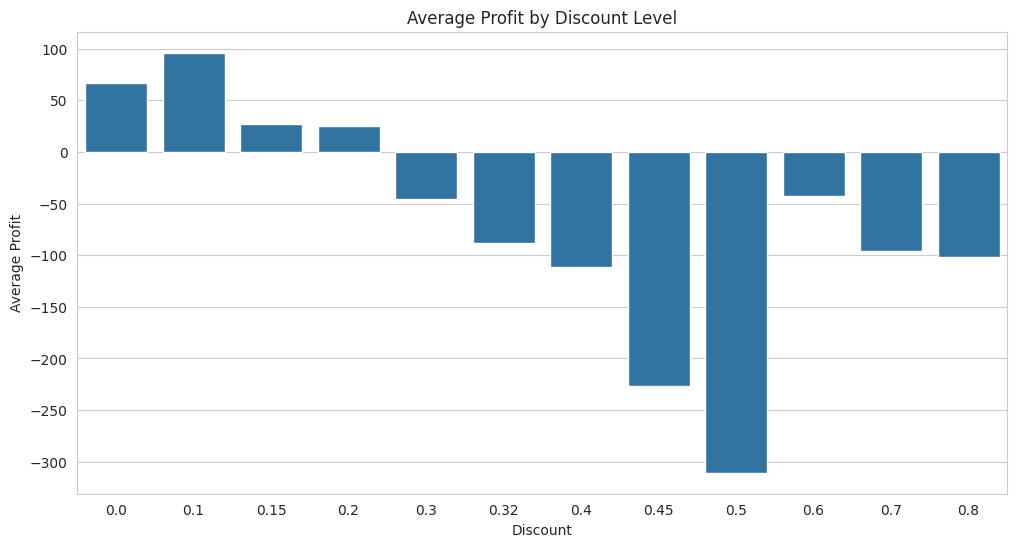

In [7]:
# Group by the 'Discount' level and calculate the average profit
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount', y='Profit', data=discount_profit)
plt.title('Average Profit by Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

Insight: This chart shows that as the discount level increases, the average profit turns negative. This is a significant business insight and a great talking point.